# Empirical Bernstein Stopping (EBS) Algorithm

The empirical Bernstein stopping (EBS) algorithm is a stopping algorithm which adaptively determines when to stop a sampling process.
EBS is build on the empirical Bernstein inequality [[1](https://www.cs.toronto.edu/~vmnih/docs/ebstop.pdf)], which is a modification of the Bernstein inequality.

The EBS algorithm employs the following information:
- the range $R$ of the random variables --> $\forall X_i: a \leq X_i \leq b$ hence $R = b - a$,
- the empirical variance $\overline{\sigma^2}_t=\frac{1}{t}\sum^t_{i=1}(X_i-\overline{X}_t)^2$, with $t$ being the amount of samples taken,

of the random variable $X$.

This algorithm returns an $(\epsilon,\delta)$-estimate which is at most $\epsilon$ from its actual mean with prob. at least $1-\delta$.\
Furthermore, it the following parameters characterize EBS:
- the accuracy $\epsilon$, which can be absolute or relative,
- the confidence $1-\delta$, which is the probability to return an $\epsilon$-close estimate.

In addition to various modifications to EBS, algorithms which are based on the Höffding's inequality are also included.\
This notebook may serve as a demonstration on how to use the provided algorithms.

## Important Functions

- `cond_check()`: Checks stopping condition
- `add_sample(sample)`: Processes a fresh sample
- `get_estimate()`: Returns the (current) estimate
- `get_numsamples()`: Returns the amount of samples taken

While there are more functions in the respective classes, these are the only ones that should be used.

## Usage

In [3]:
import sys
import numpy as np

# Importing the algorithms
sys.path.append("./")
import src.algorithms as alg

Define some variables for the random variable/ distribution and EBS.\
In this example, a batched uniform distribution is used.
That means $l$ many samples are batched together to create a single sample with less variance to showcase EBS.

In [ ]:
a = 0
b = 1
R = b - a
l = 10 #batch size
actual_mean = R/2 
delta = 0.1
epsilon = 0.01

Create an instance of the `EBS` class.

In [24]:
ebs = alg.EBS(epsilon=epsilon,delta=delta,range_of_rndvar= R)

Setting the random seed of numpy so that we get the same results.

In [45]:
np.random.seed(23123)

The loop where the algorithm is actually running.

In [46]:
while ebs.cond_check():
    sample = np.random.uniform(a, b, (1, l))
    sample = np.mean(sample, axis=1)[0]
    ebs.add_sample(sample)

The function `ebs.cond_check()` checks if the stopping condition of the respective algorithm is met.
While that function returns true, more samples are processed via `ebs.add_sample()`.

When terminated, various one can return various information from EBS.

In [47]:
print('Estimate: ',ebs.get_estimate())
print('variance: ',ebs.get_var()[1])
print('# Samples:',ebs.get_numsamples())

Estimate:  0.5024751746533206
variance:  0.0
# Samples: 5314


## Visualising

In [48]:
import matplotlib.pyplot as plt

In [49]:
x_values = np.arange(ebs.get_numsamples()+1)
y_values = ebs.get_mean()

Amount of samples given by Höffding's bound, $t_\text{min}$.
In contrast to EBS this method is non-adaptive and does only requires the range of the random variables.

In [50]:
tmin = alg.hoeffding_bound(delta,epsilon,R)

Below the running mean is plotted.
Additionally, a $\pm \epsilon$ regime around the actual mean $\mu = 0.5$ is displayed.

The amount of samples EBS required are shown as a red line, while Höffding's bound is blue line.

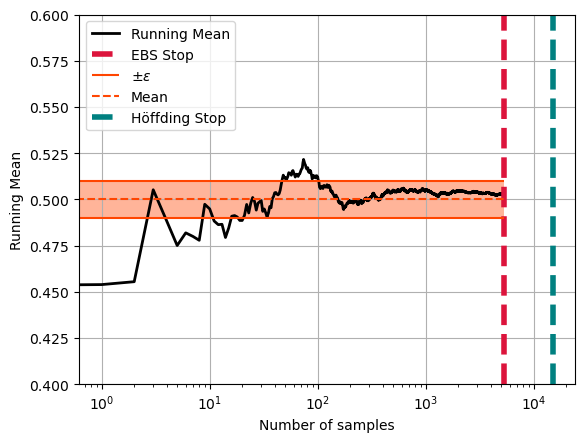

In [54]:
plt.grid()
plt.xlabel('Number of samples')
plt.ylabel('Running Mean')
plt.semilogx(x_values,y_values,label = 'Running Mean',c = 'black',lw = 2)
plt.axvline(np.round(ebs.get_numsamples()),linestyle = '--',c = 'crimson',lw = 4,label = r"EBS Stop")
plt.hlines([actual_mean-epsilon, actual_mean+epsilon], xmin=0, xmax=ebs.get_numsamples(),color = 'orangered',label=r'$\pm \epsilon$')
plt.hlines(actual_mean,xmin=0,xmax=ebs.get_numsamples(),label = 'Mean',alpha = 0.99,linestyle = '--',color = 'orangered')
plt.fill_between([0, ebs.get_numsamples()], y2 = actual_mean-epsilon,y1=actual_mean+epsilon, facecolor='orangered',alpha = 0.4)
plt.axvline(tmin,linestyle = '--',c = 'teal',lw = 4,label = r"Höffding Stop")
plt.ylim([0.4,0.6])
plt.legend()

## Using EBS in a Practical Applications: Electronic Structure Problem for $\text{H}_2$

Using the ansatz provided in this [paper](pdf/ScalableQuantumSimulationofMolecularEnergies.pdf), i.e.:

![title](pdf/h2_circuit.png)

The corresponding Hamiltonian is:
$$
\hat{\text{H}}=g_1 1_{2\times 2}+g_2 Z_0 + g_3  Z_1 + g_4 (Z_0 \otimes Z_1) + g_5 (Y_0 \otimes Y_1) + g_6 (X_0 \otimes X_1)
$$
with $\{g_i\}$ being parameters whose value depends solely on the bond length $d$ (see [thesis](pdf/Bachelor_Thesis.pdf)).

For example for $d = 0.75 \mathring{A}$, which is near the dissociation energy of $\text{H}_2$, a VQE run using EBS for all Energy estimations looks as follows:

In [32]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append("./")
from dep.qm_vqe import *

Step: 0 ... Theta:  -1
Step: 1 ... Theta:  -1.1000000008821116
Step: 2 ... Theta:  -1.2000316865091698
Step: 3 ... Theta:  -1.2939101883810158
Step: 4 ... Theta:  -1.3824764194892405
Step: 5 ... Theta:  -1.4750779293513196
Step: 6 ... Theta:  -1.5685735590655308
Step: 7 ... Theta:  -1.644323759363203
Step: 8 ... Theta:  -1.719849391215021
Step: 9 ... Theta:  -1.8022641951407778
Step: 10 ... Theta:  -1.883657036604427
Step: 11 ... Theta:  -1.9668804921607312
Step: 12 ... Theta:  -2.0538022561133933
Step: 13 ... Theta:  -2.1414521981505454
Step: 14 ... Theta:  -2.2262821648223436
Step: 15 ... Theta:  -2.3100030887101615
Step: 16 ... Theta:  -2.388834492762482
Step: 17 ... Theta:  -2.4579189441717797


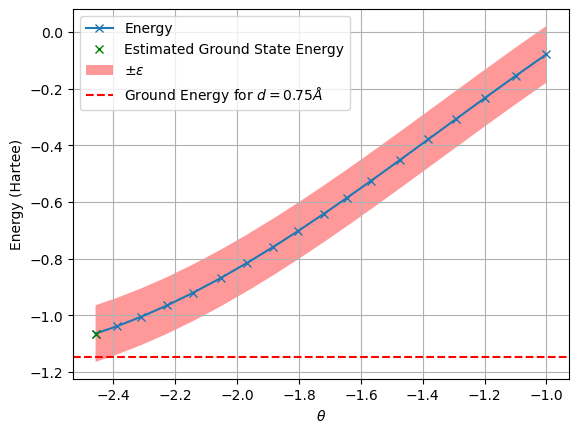

In [36]:
epsilon = 0.1
delta = 0.1
# Default g --> d = 0.75
g = [0.2252, 0.3435, -0.4347,0.5716,0.0910, 0.0910]
arr_par1, arr_energy,arr_var, est_energy, est_variance, arr_steps, arr_höf, arr_höf_adap,arr_grad1,arr_momentum,arr_epsilon = VQE_H2(eps_bern=epsilon,delta=delta,hamiltonian_coeff=g,adaptive_eps=False)

arr_par1, arr_energy, arr_var, arr_steps, arr_höf, arr_höf_adap, arr_grad1, arr_momentum, arr_epsilon = \
    [arr[:-1] for arr in [arr_par1, arr_energy, arr_var, arr_steps, arr_höf, arr_höf_adap, arr_grad1, arr_momentum, arr_epsilon]]


plt.plot(arr_par1, arr_energy, 'x-', label='Energy')
plt.plot(arr_par1[-1], arr_energy[-1], 'x',color = 'green', label='Estimated Ground State Energy')
plt.fill_between(arr_par1, arr_energy-epsilon, arr_energy+epsilon,facecolor = 'red',alpha = 0.4,label = r'$\pm \epsilon$')
plt.axhline(y=np.linalg.eigvalsh(h2_op(g))[0], color='r', linestyle='--',label = r'Ground Energy for $d = 0.75 \AA$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'Energy (Hartee)')


plt.grid()
plt.legend()
plt.show()


***

The other algorithms behave exactly the same. For more information about the modifications one can take my bachelor [thesis](pdf/Bachelor_Thesis.pdf) or the paper of Mnih et. al. [[1](https://www.cs.toronto.edu/~vmnih/docs/ebstop.pdf)] to hand.